## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

# Importing and Merging Data

In [1]:
# supress warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [4]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_data=pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet_data=pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated DataFrame

In [7]:
df_1=pd.merge(churn_data,customer_data,how="inner",on="customerID")

# Final_DataFrame with all predictor variables
telecom=pd.merge(df_1,internet_data,how="inner",on="customerID")

In [8]:
# Set display option to show all columns when printing DataFrames
pd.set_option('display.max_columns', None)

In [9]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


# Inspecting the DataFrame

In [10]:
# lets see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
# lets check the dimension of the DataFrame
telecom.shape

(7043, 21)

In [12]:
# lets check the statistical aspect of the DataFrame
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [13]:
# Lets see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


# Data Preprocessing

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [15]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


#### Correcting Datatype

In [16]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

#### Binary Encoding

In [17]:
varlist=["PhoneService","PaperlessBilling","Churn","Partner","Dependents"]

telecom[varlist]=telecom[varlist].apply(lambda x:x.map({"Yes":1,"No":0}))

#### For Categorial Variables with multiple levels,create dummy features( One Hot Encoded(OHE))

In [18]:
# creating dummy variables for some of the categorial variables and dropping the first one

df_1=pd.get_dummies(telecom[["Contract","PaymentMethod","gender","InternetService"]],drop_first=True)
telecom=pd.concat([telecom,df_1],axis=1)
telecom.drop(columns=["Contract","PaymentMethod","gender","InternetService"],inplace=True)


In [19]:
telecom["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [20]:
# Creating dummy variables for the variable 'MultipleLines'

df_2 = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
telecom = pd.concat([telecom,df_2], axis=1)
telecom.drop(columns=["MultipleLines",'MultipleLines_No phone service'], axis=1,inplace=True)

# Creating dummy variables for the variable 'OnlineSecurity'.

df_3 = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
telecom = pd.concat([telecom, df_3], axis=1)
telecom.drop(columns=["OnlineSecurity","OnlineSecurity_No internet service"], axis=1, inplace=True)

# Creating dummy variables for the variable 'OnlineBackup'.

df_4 = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
telecom = pd.concat([telecom, df_4], axis=1)
telecom.drop(columns=["OnlineBackup","OnlineBackup_No internet service"], axis=1, inplace=True)


# Creating dummy variables for the variable 'DeviceProtection'. 
df_4 = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
telecom = pd.concat([telecom, df_4], axis=1)
telecom.drop(columns=["DeviceProtection","DeviceProtection_No internet service"], axis=1, inplace=True)


# Creating dummy variables for the variable 'TechSupport'. 
df_5 = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
telecom = pd.concat([telecom, df_5], axis=1)
telecom.drop(columns=["TechSupport","TechSupport_No internet service"], axis=1, inplace=True)


# Creating dummy variables for the variable 'StreamingTV'.
df_6 = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
telecom = pd.concat([telecom, df_6], axis=1)
telecom.drop(columns=["StreamingTV","StreamingTV_No internet service"], axis=1, inplace=True)


# Creating dummy variables for the variable 'StreamingMovies'. 
df_7 = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
telecom = pd.concat([telecom, df_7], axis=1)
telecom.drop(columns=["StreamingMovies","StreamingMovies_No internet service"], axis=1, inplace=True)

In [21]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now you can see that you have all variables as numeric

In [22]:
telecom.head(3)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0


#### checking for outliers

In [23]:
# Checking for outliers in the continuous variables

num_telecom=["tenure","MonthlyCharges","TotalCharges"]

telecom[num_telecom].describe(percentiles=[0.25, 0.5, 0.75, 0.80, 0.85, 0.9, 0.95, 1])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
80%,60.000000,94.250000,4475.410000
85%,65.000000,98.550000,5200.150000
90%,69.000000,102.600000,5976.640000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing values

In [24]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [25]:
# checking the percentage of missing values
telecom.isnull().sum()/len(telecom)*100

customerID                               0.000000
tenure                                   0.000000
PhoneService                             0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.000000
TotalCharges                             0.156183
Churn                                    0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
Contract_One year                        0.000000
Contract_Two year                        0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaymentMethod_Electronic check           0.000000
PaymentMethod_Mailed check               0.000000
gender_Male                              0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.000000
MultipleLines_No                         0.000000
MultipleLines_Yes                        0.000000


Only 0.15% value is misising,so its better to drop these values instead of imputing them

In [26]:
# Removing NaN TotalCharges rows
telecom=telecom[~(telecom["TotalCharges"].isnull())]

# Preparing the Data for Modelling

#### Train-Test Split

In [27]:
df_train,df_test=train_test_split(telecom,train_size=0.7,random_state=100)

#### Rescaling of Features

In [28]:
scaler=StandardScaler()

num_vars=["tenure","MonthlyCharges","TotalCharges"]

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_test[num_vars]=scaler.transform(df_test[num_vars])

#### Dividing into X sets and y sets

In [29]:
X_train=df_train.drop(columns=["customerID","Churn"],axis=1)
y_train=df_train["Churn"]
X_test=df_test.drop(columns=["customerID","Churn"],axis=1)
y_test=df_test["Churn"]

In [30]:
# checking the churn rate

churn_rate=telecom["Churn"].sum()/len(telecom["Churn"])*100
churn_rate


26.578498293515356

we have about 27% churn rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced.

# Step 5 : Looking at correlations

##### Looking at correlations

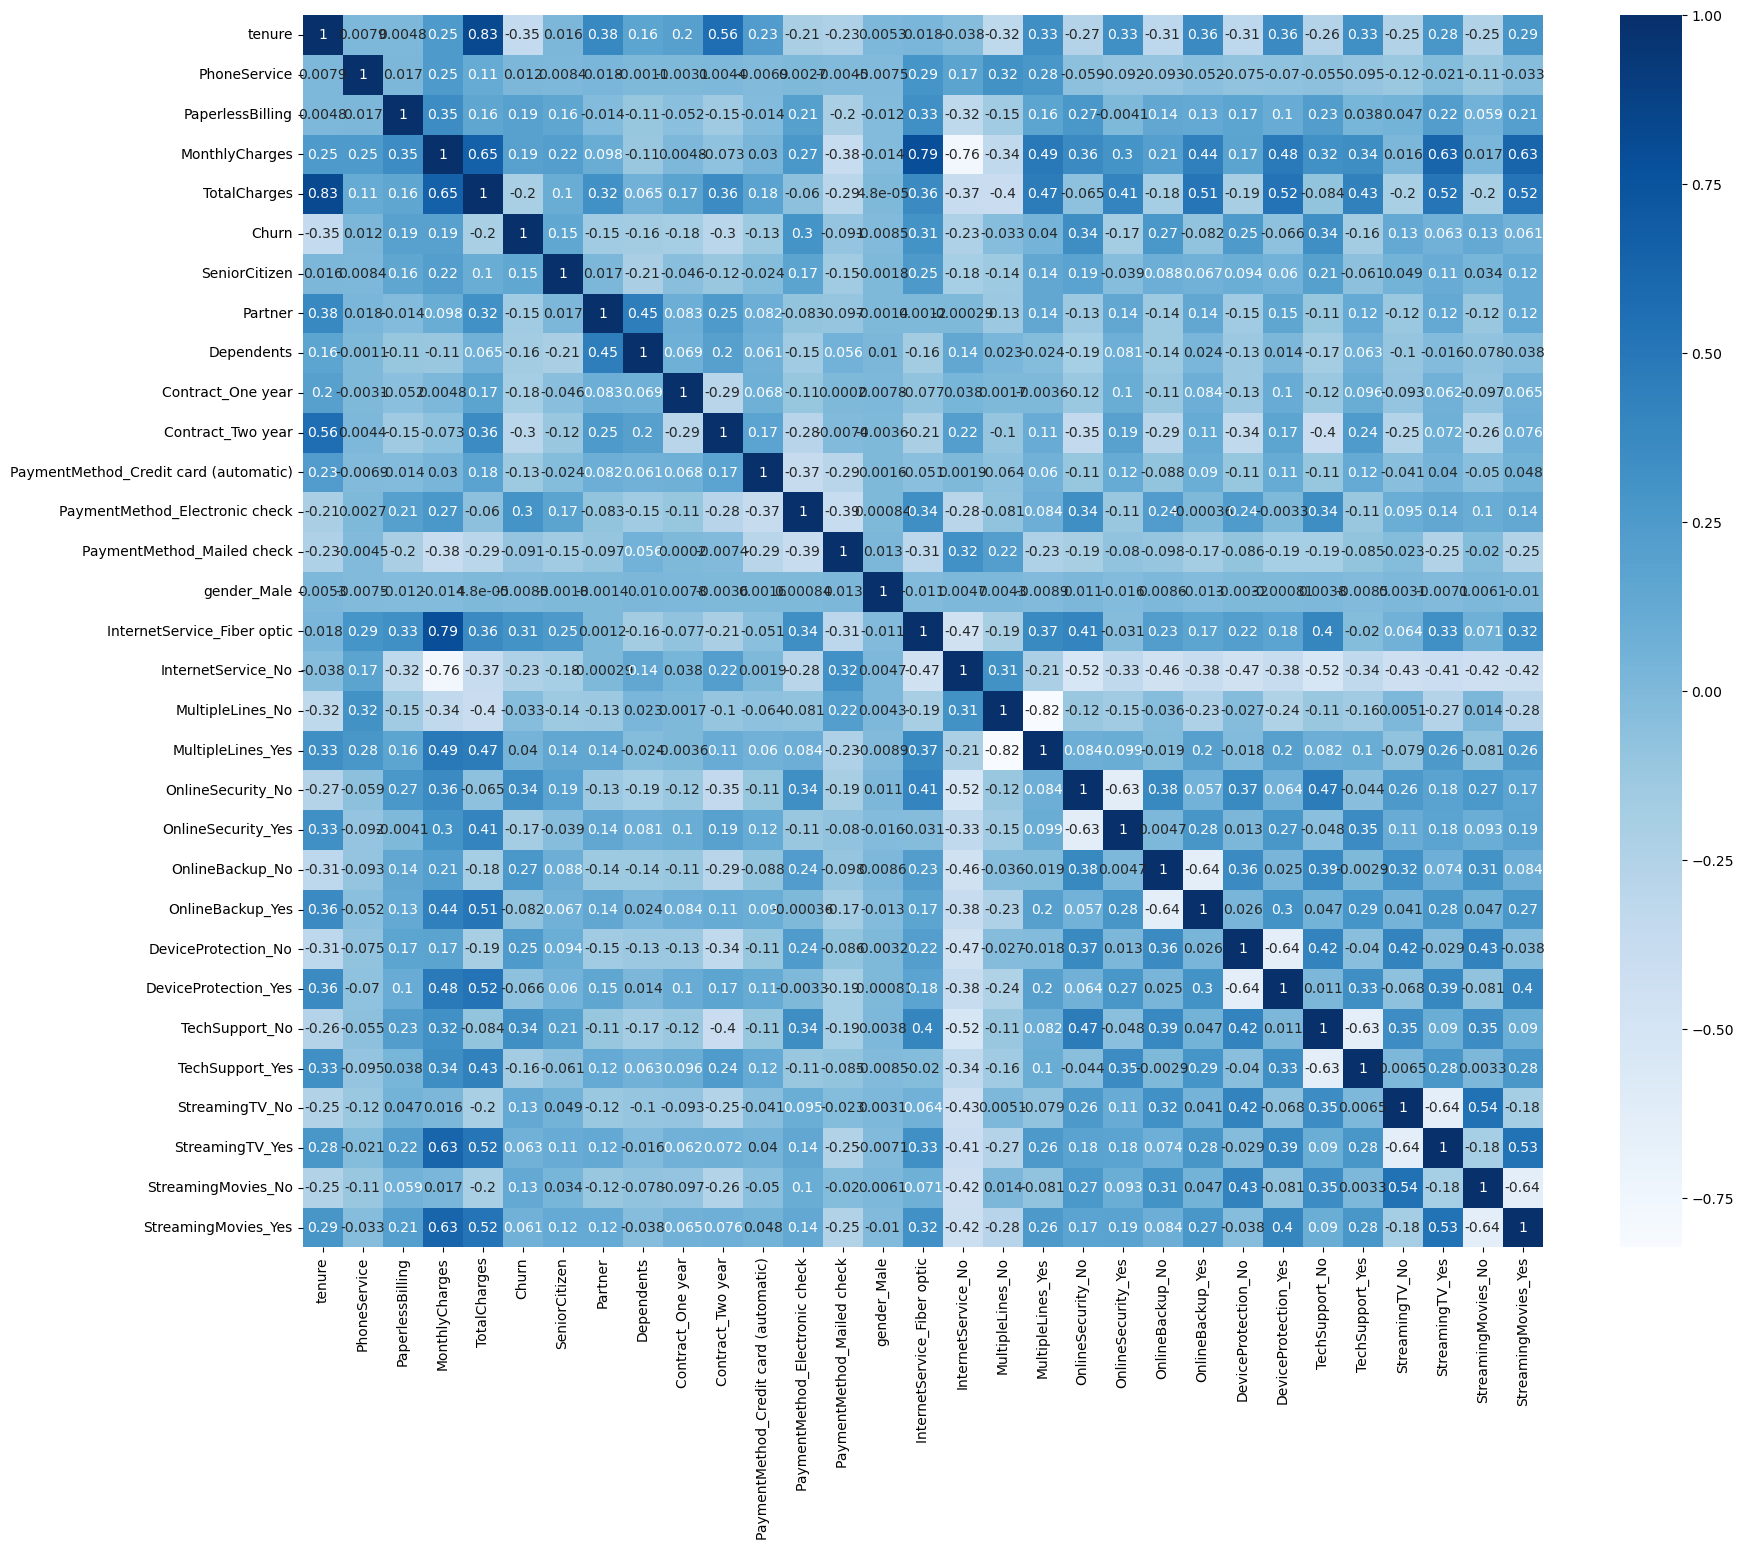

In [31]:
# Lets see the Corelation Matrix

plt.figure(figsize=(20,16))
sns.heatmap(telecom.corr(),annot=True,cmap="Blues")
plt.show()


##### Dropping highly correlated variables

In [32]:

X_train=X_train.drop(columns=['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],axis=1)
X_test=X_test.drop(columns=['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],axis=1)

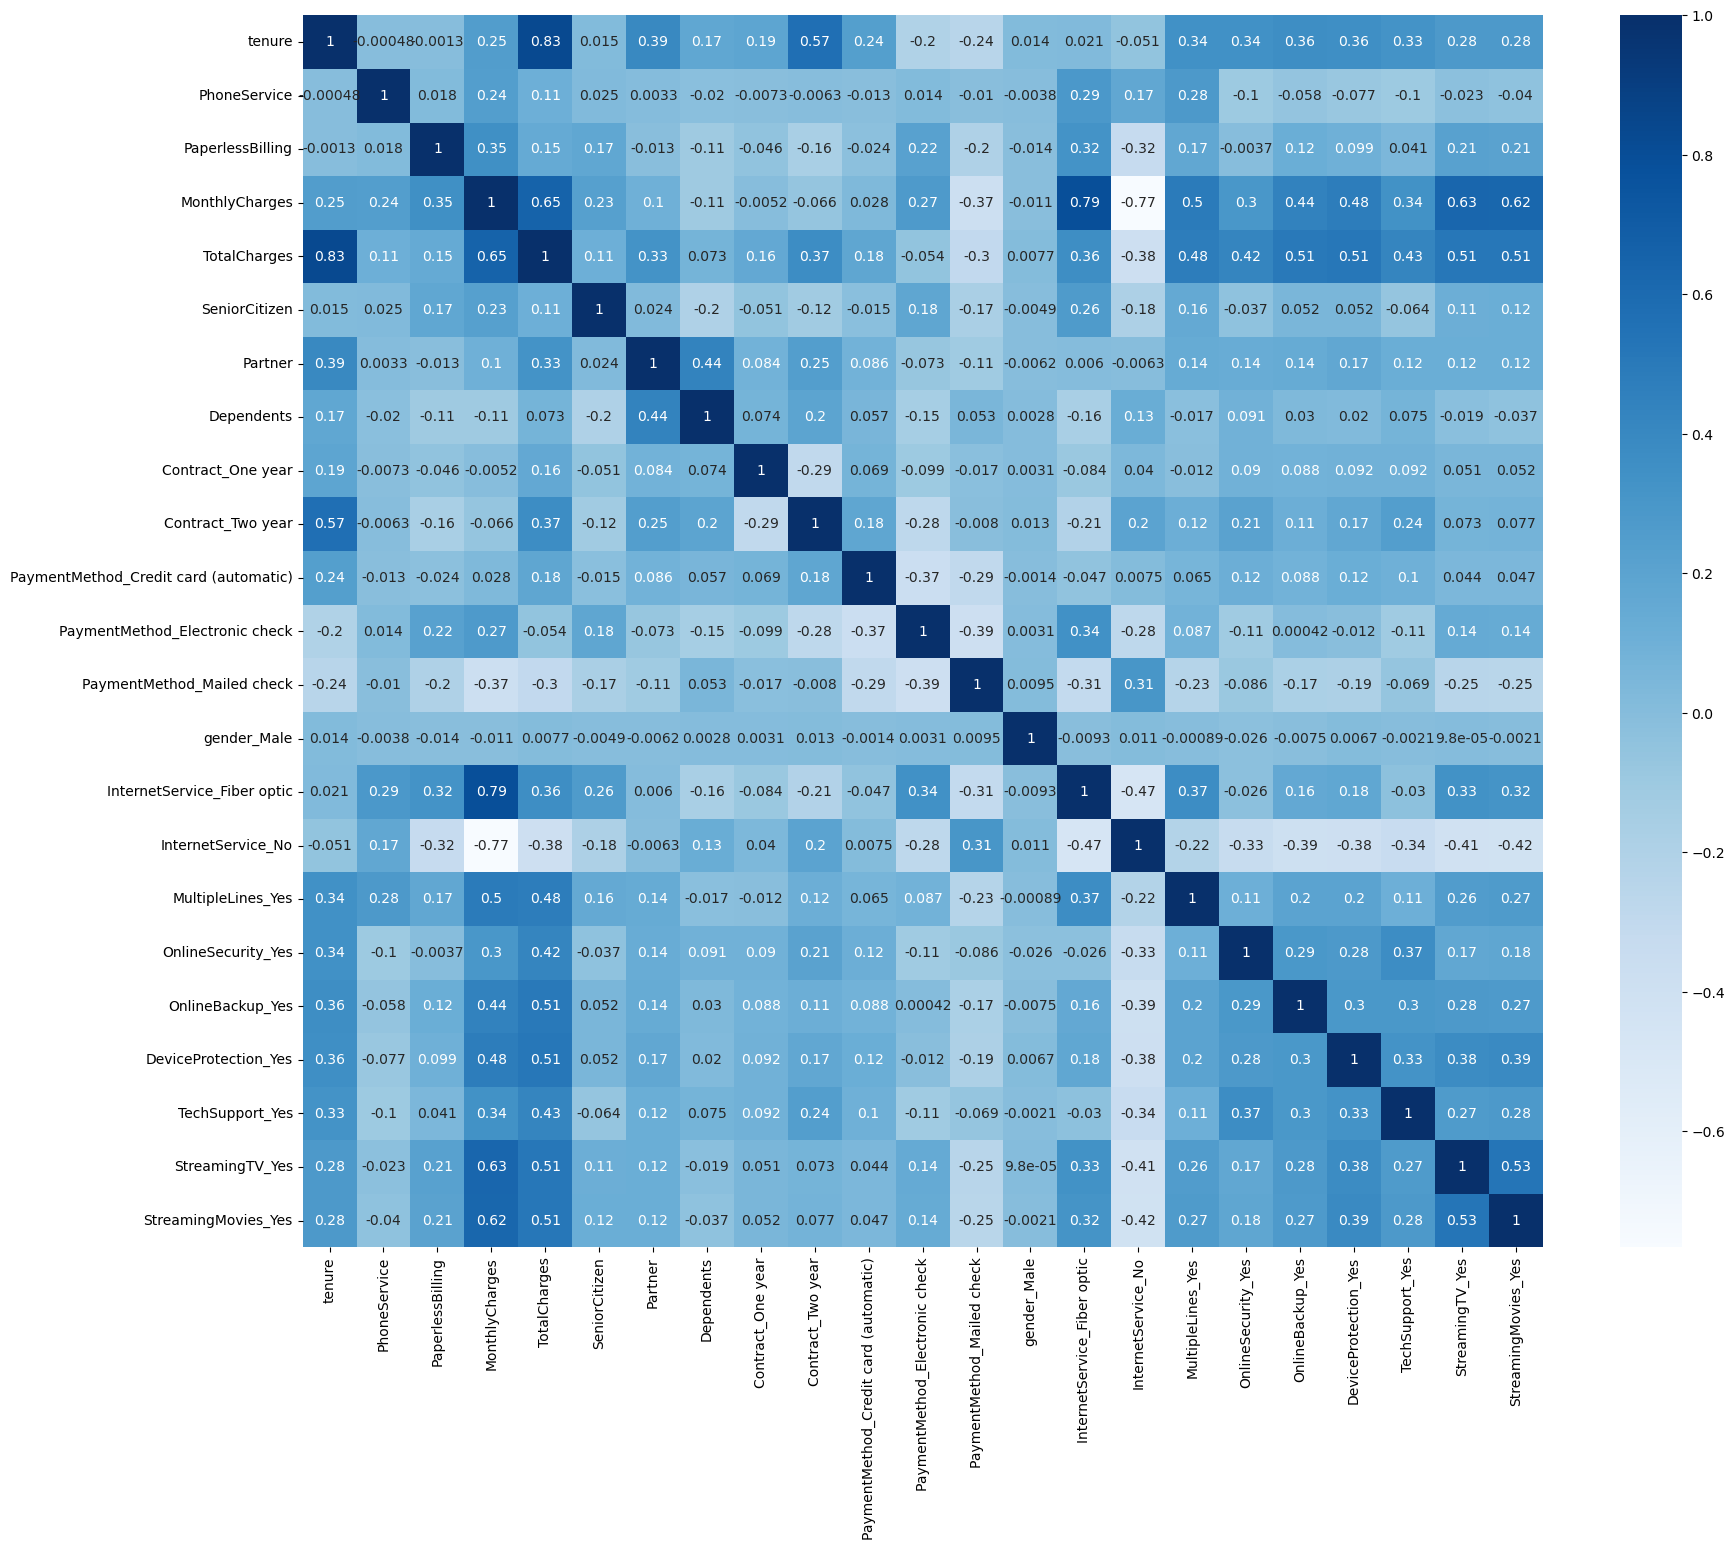

In [33]:
# After dropping highly correlated variables now let's check the correlation matrix again.

plt.figure(figsize=(20,16))
sns.heatmap(X_train.corr(),annot=True,cmap="Blues")
plt.show()

# Step 6 : Model Building

<span style="background-color: yellow; padding: 5px;"><strong>Model 1</strong></span>

#### Running Your First Training Model

In [34]:
# Logistic regression model

# adding a constant
X_train_sm=sm.add_constant(X_train)

# Creating a model and fit
logr_1=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()     # The GLM() method is used to fit a logistic regression model using statsmodels

# params
logr_1.params

#summary
logr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 25 May 2024   Deviance:                       4009.4
Time:                        11:06:42   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

<span style="background-color: yellow; padding: 5px;"><strong>Model 2</strong></span>


### Feature Selection Using RFE

In [35]:
# Running RFE with the output no of variables equal to 15

# creating a logistic regression object and then fit
lm=LogisticRegression()         
lm.fit(X_train,y_train)

rfe=RFE(estimator=lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [37]:
col=X_train.columns[rfe.support_]
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

We decided to go ahead with this model but since we are also interested in the statistics, we take the columns selected by RFE #and use them to build a model using statsmodels

In [39]:
X_train_rfe=X_train[col]

In [40]:
# adding a constant
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# Creating a model and fit
logr_2=sm.GLM(y_train,X_train_rfe_sm,family = sm.families.Binomial()).fit()

# params
logr_2.params

#summary
logr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Sat, 25 May 2024   Deviance:                       4022.2
Time:                        11:06:43   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [41]:
# Getting the predicted values on the train set

y_train_pred=logr_2.predict(X_train_rfe_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [42]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[0:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [43]:
y_train_pred_final = pd.DataFrame({
                                    'CustID'   :    y_train.index,
                                     'Churn'    :   y_train.values, 
                                    'Churn_Prob':   y_train_pred
                                  })
y_train_pred_final.head()

,CustID,Churn,Churn_Prob
0,879,0,0.192642
1,5790,0,0.275624
2,6498,1,0.599507
3,880,1,0.513571
4,2784,1,0.648233


Since the logistic curve gives you just the probabilities and not the actual classification of 'Churn' and 'Non-Churn', you need to find a threshold probability to classify customers as 'churn' and 'non-churn'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer churning is less than 0.5, you'd classify it as 'Non-Churn' and if it's greater than 0.5, you'd classify it as 'Churn'. The choice of 0.5 is completely arbitrary at this stage and you'll learn how to find the optimal cutoff in 'Model Evaluation', but for now, we'll move forward with 0.5 as the cutoff.

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [44]:
y_train_pred_final['predicted'] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,879,0,0.192642,0
1,5790,0,0.275624,0
2,6498,1,0.599507,1
3,880,1,0.513571,1
4,2784,1,0.648233,1


You chose a cutoff of 0.5 in order to classify the customers into 'Churn' and 'Non-Churn'. Now, since you're classifying the customers into two classes, you'll obviously have some errors. The classes of errors that would be there are:

- 'Churn' customers being (incorrectly) classified as 'Non-Churn'
- 'Non-Churn' customers being (incorrectly) classified as 'Churn'
 

To capture these errors, and to evaluate how well the model is, you'll use something known as the 'Confusion Matrix'. 

Now, the simplest model evaluation metric for classification models is accuracy - it is the percentage of correctly predicted labels. So what would the correctly predicted labels be? They would be:

- 'Churn' customers being actually identified as churn
- 'Non-churn' customers being actually identified as non-churn.

Accuracy is defined as:  Correctly predicted labels/Total no of labels
 
 



In [45]:
# confusion matrix

confusion=metrics.confusion_matrix(y_train_pred_final["Churn"],y_train_pred_final["predicted"])
print(confusion)

[[3275  360]
 [ 574  713]]


In [46]:
# Let's check the overall accuracy by applying the 'accuracy_score' function to the above matrix
print(metrics.accuracy_score(y_train_pred_final["Churn"],y_train_pred_final["predicted"]))

0.8102397399431126


#### Checking VIFs

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'MonthlyCharges' has the highest VIF. So let's start by dropping that.

<span style="background-color: yellow; padding: 5px;"><strong>Model 3</strong></span>

##### Dropping the variable "MonthlyCharges" and updating the model

In [48]:
X_train_new=X_train_rfe.drop(columns=["MonthlyCharges"],axis=1)

In [49]:
# adding a constant
X_train_sm=sm.add_constant(X_train_new)

# Creating a model and fit
logr_3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

# params
logr_3.params

#summary
logr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Sat, 25 May 2024   Deviance:                       4046.2
Time:                        11:06:44   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2790
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
TechSupport_Yes                          -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

In [50]:
y_train_pred =logr_3.predict(X_train_sm).values.reshape(-1)

In [51]:
y_train_pred[:10]

array([0.22790197, 0.22864388, 0.67489226, 0.61586836, 0.66226032,
       0.41819928, 0.28813321, 0.7951366 , 0.17433167, 0.51908788])

In [52]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [53]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,879,0,0.227902,0
1,5790,0,0.228644,0
2,6498,1,0.674892,1
3,880,1,0.615868,1
4,2784,1,0.662260,1


In [54]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Churn"],y_train_pred_final["predicted"]))

0.8057700121901666


So overall the accuracy hasn't dropped much.

In [55]:
# Checking Vifs again for this new model

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.46
0,tenure,6.90
5,Contract_Two year,3.07
8,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
1,PaperlessBilling,2.55
9,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


As the Variable "MultipleLines_Yes" has high p-value which makes it insignificant,so its better to drop it

<span style="background-color: yellow; padding: 5px;"><strong>Model 4</strong></span>


##### Dropping the variable "MultipleLines_Yes" and updating the model

In [56]:
X_train_new=X_train_new.drop(columns=["MultipleLines_Yes"],axis=1)

In [57]:
# adding a constant
X_train_sm=sm.add_constant(X_train_new)

# Creating a model and fit
logr_4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

# params
logr_4.params

#summary
logr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.8
Date:                Sat, 25 May 2024   Deviance:                       4049.5
Time:                        11:06:44   Pearson chi2:                 5.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2785
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5390      0.126    -12.238      0.000      -1.785      -1.293
tenure                                   -1.3489      0.179     -7.527      0.000      -1.700      -0.998
PaperlessBilling                          0.3602      0.089      4.037      0.000       0.185       0.535
TotalCharges                              0.4932      0.183      2.697      0.007       0.135       0.852
SeniorCitizen                             0.4655      0.099      4.701      0.000       0.271       0.660
Contract_One year                        -0.7459      0.127     -5.877      0.000      -0.995      -0.497
Contract_Two year                        -1.3430      0.210     -6.392      0.000      -1.755      -0.931
PaymentMethod_Credit card (automatic)    -0.3864      0.112     -3.440      0.001      -0.607      -0.166
PaymentMethod_Mailed check               -0.3703      0.110     -3.353      0.001      -0.587      -0.154
InternetService_Fiber optic               0.7172      0.108      6.615      0.000       0.505       0.930
InternetService_No                       -0.9545      0.156     -6.110      0.000      -1.261      -0.648
TechSupport_Yes                          -0.4426      0.101     -4.365      0.000      -0.641      -0.244
StreamingTV_Yes                           0.2868      0.096      2.983      0.003       0.098       0.475
StreamingMovies_Yes                       0.1935      0.096      2.023      0.043       0.006       0.381
=========================================================================================================
"""

In [58]:
y_train_pred = logr_4.predict(X_train_sm).values.reshape(-1)

In [59]:
y_train_pred[:10]

array([0.20722391, 0.23757201, 0.6884431 , 0.6327585 , 0.67560872,
       0.42692131, 0.29226155, 0.77852895, 0.17827156, 0.49840048])

In [60]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [61]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,879,0,0.207224,0
1,5790,0,0.237572,0
2,6498,1,0.688443,1
3,880,1,0.632758,1
4,2784,1,0.675609,1


In [62]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Churn"],y_train_pred_final["predicted"]))

0.8035351483136937


The accuracy is still practically the same.

In [63]:
# Checking Vifs again for this new model

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.35
0,tenure,6.90
5,Contract_Two year,3.05
8,InternetService_Fiber optic,2.70
12,StreamingMovies_Yes,2.61
11,StreamingTV_Yes,2.59
1,PaperlessBilling,2.49
9,InternetService_No,2.40
10,TechSupport_Yes,1.95
4,Contract_One year,1.79


 Dropping the variable "MultipleLines_Yes" on the basis of High Vif

<span style="background-color: yellow; padding: 5px;"><strong>Model 5</strong></span>

##### Dropping the variable "TotalCharges" and updating the model

In [64]:
X_train_new=X_train_new.drop(columns=["TotalCharges"],axis=1)

In [65]:
# adding a constant
X_train_sm=sm.add_constant(X_train_new)

# Creating a model and fit
logr_5=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

# params
logr_5.params

#summary
logr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.5
Date:                Sat, 25 May 2024   Deviance:                       4057.1
Time:                        11:06:45   Pearson chi2:                 5.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2774
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5953      0.123    -12.944      0.000      -1.837      -1.354
tenure                                   -0.9025      0.062    -14.475      0.000      -1.025      -0.780
PaperlessBilling                          0.3528      0.089      3.959      0.000       0.178       0.527
SeniorCitizen                             0.4711      0.099      4.741      0.000       0.276       0.666
Contract_One year                        -0.7415      0.126     -5.874      0.000      -0.989      -0.494
Contract_Two year                        -1.3118      0.208     -6.303      0.000      -1.720      -0.904
PaymentMethod_Credit card (automatic)    -0.3867      0.112     -3.439      0.001      -0.607      -0.166
PaymentMethod_Mailed check               -0.3362      0.110     -3.070      0.002      -0.551      -0.122
InternetService_Fiber optic               0.8626      0.094      9.169      0.000       0.678       1.047
InternetService_No                       -0.9718      0.155     -6.257      0.000      -1.276      -0.667
TechSupport_Yes                          -0.4058      0.101     -4.032      0.000      -0.603      -0.208
StreamingTV_Yes                           0.3458      0.094      3.695      0.000       0.162       0.529
StreamingMovies_Yes                       0.2496      0.093      2.675      0.007       0.067       0.432
=========================================================================================================
"""

In [66]:
y_train_pred = logr_5.predict(X_train_sm).values.reshape(-1)

In [67]:
y_train_pred[:10]

array([0.22091782, 0.28438286, 0.68590164, 0.65455026, 0.70268409,
       0.40702394, 0.27875266, 0.77765989, 0.20869313, 0.50443085])

In [68]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [69]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,879,0,0.220918,0
1,5790,0,0.284383,0
2,6498,1,0.685902,1
3,880,1,0.654550,1
4,2784,1,0.702684,1


In [70]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Churn"],y_train_pred_final["predicted"]))

0.8031288094270622


The accuracy is still practically the same.

In [71]:
# Checking Vifs again for this new model

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,Contract_Two year,2.97
11,StreamingMovies_Yes,2.53
10,StreamingTV_Yes,2.50
1,PaperlessBilling,2.41
7,InternetService_Fiber optic,2.33
8,InternetService_No,2.01
0,tenure,1.97
9,TechSupport_Yes,1.92
3,Contract_One year,1.78
6,PaymentMethod_Mailed check,1.63


In [72]:
vif["Features"].unique()

array(['Contract_Two year', 'StreamingMovies_Yes', 'StreamingTV_Yes',
       'PaperlessBilling', 'InternetService_Fiber optic',
       'InternetService_No', 'tenure', 'TechSupport_Yes',
       'Contract_One year', 'PaymentMethod_Mailed check',
       'PaymentMethod_Credit card (automatic)', 'SeniorCitizen'],
      dtype=object)

All variables have a good value of VIF and p-value is within range. So we need not drop any more variables and we can proceed with making predictions using this model only

 Hence, some of these variables were removed first based on an automated # approach, i.e. RFE and then a manual approach based on VIF and p-value.

# Metrics beyond Simple Accuracy

In [73]:
confusion

array([[3275,  360],
       [ 574,  713]], dtype=int64)

In [74]:
TP=confusion[1,1]    # true positive
TN=confusion[0,0]    # true negatives
FN=confusion[1,0]    # false positives
FP=confusion[0,1]    # false negatives

In [75]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.554001554001554

In [76]:
# Let us calculate specificity
TN / (TN+FN)

0.8508703559366069

In [77]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ (TN+FP)

0.09903713892709766

In [78]:
# positive predictive value 
TP / (TP+FP)

0.6644920782851818

In [79]:
# Negative predictive value
TN / (TN+ FN)

0.8508703559366069

# Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"], drop_intermediate = False )

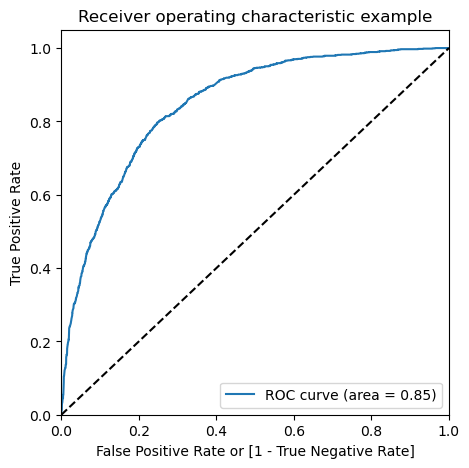

In [82]:
# Calling the function
draw_roc(y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"])

####### Interpreting the ROC Curve


The 
45
degree
 Diagonal

For a completely random model, the ROC curve will pass through the 45-degree line that has been shown in the graph above and in the best case it passes through the upper left corner of the graph. So the least area that an ROC curve can have is 0.5, and the highest area it can have is 1.

 

The Sensitivity vs Specificity Trade-off

As you saw in the last segment as well, the ROC curve shows the trade-off between True Positive Rate and False Positive Rate which essentially can also be viewed as a tradeoff between Sensitivity and Specificity. As you can see, on the Y-axis, you have the values of Sensitivity and on the X-axis, you have the value of (1 - Specificity). Notice that in the curve when Sensitivity is increasing, (1 - Specificity), And since, (1 - Specificity) is increasing, it simply means that Specificity is decreasing. 

 

Area Under the Curve

By determining the area under the curve (AUC) of an ROC curve, you can determine how good the model is. If the ROC curve is more towards the upper-left corner of the graph, it means that the model is very good and if it is more towards the 45-degree diagonal, it means that the model is almost completely random. So, the larger the AUC, the better will be your model which is something you saw in the last segment as well.

# Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [83]:
numbers=[x/10 for x in range(10)]

In [84]:
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final["Churn_Prob"].map(lambda x:1 if x>i else 0)

y_train_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,879,0,0.220918,0,1,1,1,0,0,0,0,0,0,0
1,5790,0,0.284383,0,1,1,1,0,0,0,0,0,0,0
2,6498,1,0.685902,1,1,1,1,1,1,1,1,0,0,0
3,880,1,0.654550,1,1,1,1,1,1,1,1,0,0,0
4,2784,1,0.702684,1,1,1,1,1,1,1,1,1,0,0


In [85]:
#from sklearn.metrics import confusion_matrix

In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm= metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i,accuracy,sensi,speci]
    
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.617838,0.944833,0.502063
0.2,0.2,0.723283,0.850039,0.678404
0.3,0.3,0.769200,0.776224,0.766713
0.4,0.4,0.790532,0.635587,0.845392
0.5,0.5,0.803129,0.530692,0.899587
0.6,0.6,0.800284,0.388500,0.946080
0.7,0.7,0.776920,0.193473,0.983494
0.8,0.8,0.745835,0.034188,0.997799
0.9,0.9,0.738521,0.000000,1.000000


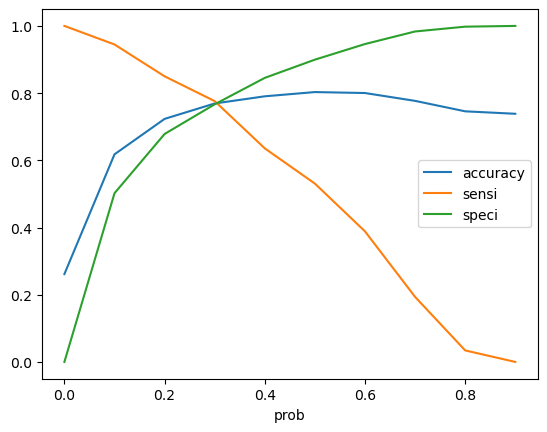

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The optimal cut-off point exists where the values of accuracy, sensitivity, and specificity are fairly decent and almost equal. 

And at about 0.3, the three metrics seem to be almost equal with decent values and hence, we choose 0.3 as the optimal cut-off point. The following graph also showcases that at about 0.3, the three metrics intersect.

As you can see, at about a threshold of 0.3, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 77-78%.

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Churn_Prob"].map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,879,0,0.220918,0,1,1,1,0,0,0,0,0,0,0,0
1,5790,0,0.284383,0,1,1,1,0,0,0,0,0,0,0,0
2,6498,1,0.685902,1,1,1,1,1,1,1,1,0,0,0,1
3,880,1,0.654550,1,1,1,1,1,1,1,1,0,0,0,1
4,2784,1,0.702684,1,1,1,1,1,1,1,1,1,0,0,1


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final["Churn"], y_train_pred_final["final_predicted"])

0.7691995123933361

In [90]:
confusion2 = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["final_predicted"] )
confusion2

array([[2787,  848],
       [ 288,  999]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.7762237762237763

In [93]:
# Let us calculate specificity
TN /(TN+FP)

0.7667125171939477

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/(TN+FP))

0.23328748280605227


In [95]:
# Positive predictive value 
print (TP / (TP+FP))

0.5408770979967515


In [96]:
# Negative predictive value
print (TN / (TN+ FN))

0.9063414634146342


# Precision and Recall

In [97]:
#Looking at the confusion matrix again

In [98]:
confusion = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predicted"] )
confusion

array([[3270,  365],
       [ 604,  683]], dtype=int64)

##### Precision
TP / (TP + FP)

In [99]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6517175572519084

##### Recall
TP / TP + FN

In [100]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5306915306915307

(Instead of using manually),Using sklearn utilities for the same

In [101]:
from sklearn.metrics import precision_score, recall_score

In [102]:
# ?precision_score

In [103]:
precision_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"])

0.6517175572519084

In [104]:
recall_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"])

0.5306915306915307

### Precision and recall tradeoff

In [105]:
from sklearn.metrics import precision_recall_curve

In [106]:
y_train_pred_final["Churn"], y_train_pred_final["predicted"]

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"])

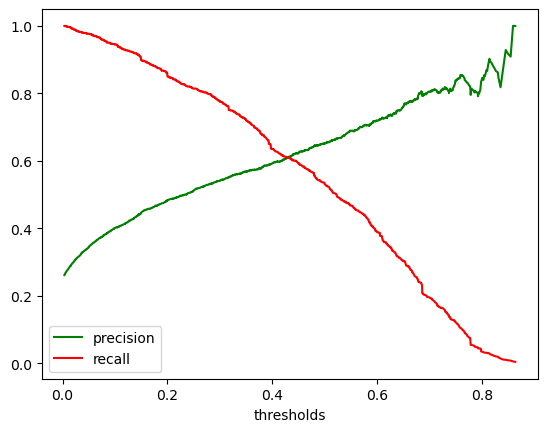

In [108]:
plt.plot(thresholds, p[:-1], "g-",label="precision")
plt.plot(thresholds, r[:-1], "r-",label="recall")
plt.legend()
plt.xlabel("thresholds")
plt.show()

# Step 11: Making predictions on the test set

we have to choose one threshold that we determined during the training phase. Now, you can choose either the sensitivity-specificity view (where the cut-off came to be 0.3) or the precision-recall view (where the cut-off came to be 0.42) when making predictions

we will go forward with the precision-recall  view of things and make predictions based on the 0.42 cut-off 

In [109]:
# creating a X_tet_new DataFrame be selecting the variables that were part of final model
X_test_new = X_test[X_train_new.columns]

In [110]:
# add a constant to test DataFrame
X_test_sm=sm.add_constant(X_test_new)

In [111]:
# making prediction on the test set using our final model
#y_test_pred = logr_5.predict(X_test_sm)
#y_test_pred[:10]

y_test_pred = logr_5.predict(X_test_sm).values.reshape(-1)

In [112]:
#y_test_pred = y_test_pred.values.reshape(-1)
#y_test_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [113]:
y_test_pred_final = pd.DataFrame({
                                    'CustID'   :    y_test.index,
                                     'Churn'    :   y_test.values, 
                                    'Churn_Prob':   y_test_pred
                                  })
y_test_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.449353
1,3730,1,0.254817
2,1761,0,0.007756
3,2283,1,0.609418
4,1872,0,0.014900


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.42 else 0

In [114]:
y_test_pred_final['predicted'] = y_test_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.42 else 0)

# Let's see the head
y_test_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.449353,1
1,3730,1,0.254817,0
2,1761,0,0.007756,0
3,2283,1,0.609418,1
4,1872,0,0.014900,0


In [115]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final["Churn"], y_test_pred_final["predicted"])

0.7815165876777251

In [116]:
confusion2 = metrics.confusion_matrix(y_test_pred_final["Churn"], y_test_pred_final["predicted"])
confusion2

array([[1286,  242],
       [ 219,  363]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.6237113402061856

In [119]:
# Let us calculate specificity
TN / (TN+FP)

0.8416230366492147